In [48]:
import pandas as pd

In [49]:
df = pd.read_pickle("./data/df_concat_with_text_and_image_tokens.pkl")

In [50]:
df.head()

,questionId,question,question_types,image,docId,ucsf_document_id,ucsf_document_page_no,answers,data_split,image_path,text,llm_tokens_count,text_length,words_count,image_tokens
0,337,what is the date mentioned in this letter?,"[handwritten, form]",documents/xnbl0037_1.png,279,xnbl0037,1,[1/8/93],train,./images/spdocvqa_images/xnbl0037_1.png,<Page 1> Confidential .. .. RJRT PR APPROVAL D...,112,389,39,"{'patch_tokens': 1470, 'total_tokens': 2381.4,..."
1,338,what is the contact person name mentioned in l...,"[handwritten, form]",documents/xnbl0037_1.png,279,xnbl0037,1,"[P. Carter, p. carter]",train,./images/spdocvqa_images/xnbl0037_1.png,<Page 1> Confidential .. .. RJRT PR APPROVAL D...,112,389,39,"{'patch_tokens': 1470, 'total_tokens': 2381.4,..."
2,339,Which corporation's letterhead is this?,[layout],documents/mxcj0037_1.png,280,mxcj0037,1,[Brown & Williamson Tobacco Corporation],train,./images/spdocvqa_images/mxcj0037_1.png,<Page 1> B&W BROWN & WILLIAMSON TOBACCO CORPOR...,451,2183,246,"{'patch_tokens': 1496, 'total_tokens': 2423.52..."
3,340,Who is in cc in this letter?,"[form, layout]",documents/mxcj0037_1.png,280,mxcj0037,1,[T.F. Riehl],train,./images/spdocvqa_images/mxcj0037_1.png,<Page 1> B&W BROWN & WILLIAMSON TOBACCO CORPOR...,451,2183,246,"{'patch_tokens': 1496, 'total_tokens': 2423.52..."
4,341,what is the subject of this letter?,"[form, layout]",documents/mxcj0037_1.png,280,mxcj0037,1,[Review of existing Brainstorming Ideas/483],train,./images/spdocvqa_images/mxcj0037_1.png,<Page 1> B&W BROWN & WILLIAMSON TOBACCO CORPOR...,451,2183,246,"{'patch_tokens': 1496, 'total_tokens': 2423.52..."


epoch 0 : 1.14
epoch 1 : 0.033
epoch 2:  0.012


In [51]:
models = [
    "gpt-4-1-mini",
    "gpt-4-1-mini-multimodal",
    "gpt-4-1-mini-only-image",
    "gpt-4-1-nano",
    "gpt-4-1-nano-multimodal",
    "gpt-4-1-nano-only-image",
    "llama_finetuned_2_image_only",
    "llama_finetuned_2_text_only",
    "llama_finetuned_2_multimodal",
    "llama_finetuned_image_only",
    "llama_finetuned_text_only",
    "llama_finetuned_multimodal",
    "llama_only_image",
    "llama_only_text",
    "llama_multimodal",
    "llama_finetuned_2_multimodal_json",
    "llama_finetuned_2_text_only_json",
    "llama_finetuned_2_image_only_json",
    "llama_finetuned_multimodal_json",
    "llama_finetuned_text_only_json",
    "llama_finetuned_image_only_json",
]

In [52]:
results_dir = "./results"

In [53]:
df_validation = df[df["data_split"] == "val"].copy()

In [54]:
import json

def get_question_result(model_name,question_id):
    with open(f"{results_dir}/{model_name}/val/{question_id}.json", "r") as file:
        data = json.load(file)
    return data

def get_model_results(model_name):
    results = []
    for question_id in df_validation["questionId"].unique():
        try:
            result = get_question_result(model_name, question_id)
            results.append({
                "model": model_name,
                "question_id": question_id,
                "result": result
            })
        except FileNotFoundError:
            print(f"File not found for model {model_name} and question {question_id}")
            continue
    return results

In [55]:
results = []

for model in models:
    print(f"Processing model: {model}")
    model_results = get_model_results(model)
    results.extend(model_results)

Processing model: gpt-4-1-mini
Processing model: gpt-4-1-mini-multimodal
Processing model: gpt-4-1-mini-only-image
Processing model: gpt-4-1-nano
Processing model: gpt-4-1-nano-multimodal
File not found for model gpt-4-1-nano-multimodal and question 16835
Processing model: gpt-4-1-nano-only-image
Processing model: llama_finetuned_2_image_only
Processing model: llama_finetuned_2_text_only
Processing model: llama_finetuned_2_multimodal
Processing model: llama_finetuned_image_only
Processing model: llama_finetuned_text_only
Processing model: llama_finetuned_multimodal
Processing model: llama_only_image
Processing model: llama_only_text
Processing model: llama_multimodal
Processing model: llama_finetuned_2_multimodal_json
Processing model: llama_finetuned_2_text_only_json
Processing model: llama_finetuned_2_image_only_json
Processing model: llama_finetuned_multimodal_json
Processing model: llama_finetuned_text_only_json
Processing model: llama_finetuned_image_only_json


In [56]:
df_results = pd.DataFrame(results)

df_results.head()

,model,question_id,result
0,gpt-4-1-mini,49153,{'answer': '8.22'}
1,gpt-4-1-mini,24580,"{'answer': 'UNIVERSITY OF CALIFORNIA, SAN DIEGO'}"
2,gpt-4-1-mini,57349,{'answer': 'ITC Limited'}
3,gpt-4-1-mini,24581,"{'answer': 'UNIVERSITY OF CALIFORNIA, SAN DIEGO'}"
4,gpt-4-1-mini,24582,{'answer': 'Jasips Clinic'}


In [57]:
def extract_answers(row):
    answer = row['result'].get('answer', None)
    if not answer:
        # check unparsed_output
        unparsed_output = row['result'].get('unparsed_output', None)
        if unparsed_output:
            row["answer"] = unparsed_output
            row["parsing_error"] = True
        else:
            row["answer"] = None
            row["parsing_error"] = True
    else:
        row["parsing_error"] = False
        row["answer"] = answer
    return row

df_results = df_results.apply(extract_answers, axis=1)
   

In [58]:
df_results

,answer,model,parsing_error,question_id,result
0,8.22,gpt-4-1-mini,False,49153,{'answer': '8.22'}
1,"UNIVERSITY OF CALIFORNIA, SAN DIEGO",gpt-4-1-mini,False,24580,"{'answer': 'UNIVERSITY OF CALIFORNIA, SAN DIEGO'}"
2,ITC Limited,gpt-4-1-mini,False,57349,{'answer': 'ITC Limited'}
3,"UNIVERSITY OF CALIFORNIA, SAN DIEGO",gpt-4-1-mini,False,24581,"{'answer': 'UNIVERSITY OF CALIFORNIA, SAN DIEGO'}"
4,Jasips Clinic,gpt-4-1-mini,False,24582,{'answer': 'Jasips Clinic'}
...,...,...,...,...,...
112323,R. C. Guth,llama_finetuned_image_only_json,False,24564,{'answer': 'R. C. Guth'}
112324,AGE ADJUSTED MOTOR VEHICLE ACCIDENT MORTALITY ...,llama_finetuned_image_only_json,False,49146,{'answer': 'AGE ADJUSTED MOTOR VEHICLE ACCIDEN...
112325,Age adjusted Motor vehicle accident mortality ...,llama_finetuned_image_only_json,False,49147,{'answer': 'Age adjusted Motor vehicle acciden...
112326,1975,llama_finetuned_image_only_json,False,49150,{'answer': '1975'}


In [59]:
df_merged = pd.merge(df_results, df_validation, left_on="question_id", right_on="questionId", how="left")

In [60]:
df_merged

,answer,model,parsing_error,question_id,result,questionId,question,question_types,image,docId,ucsf_document_id,ucsf_document_page_no,answers,data_split,image_path,text,llm_tokens_count,text_length,words_count,image_tokens
0,8.22,gpt-4-1-mini,False,49153,{'answer': '8.22'},49153,"What is the ‘actual’ value per 1000, during th...",[figure/diagram],documents/pybv0228_81.png,14465,pybv0228,81,[0.28],val,./images/spdocvqa_images/pybv0228_81.png,<Page 1> FIGURE C. 2. AGE ADJUSTED MOTOR VEHIC...,90,186,12,"{'patch_tokens': 1496, 'total_tokens': 2423.52..."
1,"UNIVERSITY OF CALIFORNIA, SAN DIEGO",gpt-4-1-mini,False,24580,"{'answer': 'UNIVERSITY OF CALIFORNIA, SAN DIEGO'}",24580,What is name of university?,[others],documents/nkbl0226_1.png,7027,nkbl0226,1,"[university of california, University of Calif...",val,./images/spdocvqa_images/nkbl0226_1.png,"<Page 1> UNIVERSITY OF CALIFORNIA, SAN DIEGO T...",78,278,30,"{'patch_tokens': 884, 'total_tokens': 1432.080..."
2,ITC Limited,gpt-4-1-mini,False,57349,{'answer': 'ITC Limited'},57349,What is the name of the company?,[layout],documents/snbx0223_22.png,4733,snbx0223,22,"[itc limited, ITC Limited]",val,./images/spdocvqa_images/snbx0223_22.png,<Page 1> ITC Limited REPORT AND ACCOUNTS 2013 ...,283,1253,153,"{'patch_tokens': 1518, 'total_tokens': 2459.16..."
3,"UNIVERSITY OF CALIFORNIA, SAN DIEGO",gpt-4-1-mini,False,24581,"{'answer': 'UNIVERSITY OF CALIFORNIA, SAN DIEGO'}",24581,Where is the university located ?,[others],documents/nkbl0226_1.png,7027,nkbl0226,1,"[san diego, San Diego]",val,./images/spdocvqa_images/nkbl0226_1.png,"<Page 1> UNIVERSITY OF CALIFORNIA, SAN DIEGO T...",78,278,30,"{'patch_tokens': 884, 'total_tokens': 1432.080..."
4,Jasips Clinic,gpt-4-1-mini,False,24582,{'answer': 'Jasips Clinic'},24582,To whom is the document sent?,"[handwritten, form]",documents/nkbl0226_1.png,7027,nkbl0226,1,[Paul],val,./images/spdocvqa_images/nkbl0226_1.png,"<Page 1> UNIVERSITY OF CALIFORNIA, SAN DIEGO T...",78,278,30,"{'patch_tokens': 884, 'total_tokens': 1432.080..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112323,R. C. Guth,llama_finetuned_image_only_json,False,24564,{'answer': 'R. C. Guth'},24564,who is the vice president and secretary ?,[table/list],documents/ntnk0226_15.png,7020,ntnk0226,15,"[Raymond C. Guth, Raymond c. Guth]",val,./images/spdocvqa_images/ntnk0226_15.png,<Page 1> AMSTAR'S SENIOR REPRESENTATIVES Rober...,144,635,49,"{'patch_tokens': 1496, 'total_tokens': 2423.52..."
112324,AGE ADJUSTED MOTOR VEHICLE ACCIDENT MORTALITY ...,llama_finetuned_image_only_json,False,49146,{'answer': 'AGE ADJUSTED MOTOR VEHICLE ACCIDEN...,49146,What is the ‘title’ of the plot?,[layout],documents/pybv0228_81.png,14465,pybv0228,81,[Age adjusted motor vehicle accident mortality...,val,./images/spdocvqa_images/pybv0228_81.png,<Page 1> FIGURE C. 2. AGE ADJUSTED MOTOR VEHIC...,90,186,12,"{'patch_tokens': 1496, 'total_tokens': 2423.52..."
112325,Age adjusted Motor vehicle accident mortality ...,llama_finetuned_image_only_json,False,49147,{'answer': 'Age adjusted Motor vehicle acciden...,49147,What is ‘figure C.2.’?,[layout],documents/pybv0228_81.png,14465,pybv0228,81,[age adjusted motor vehicle accident mortality...,val,./images/spdocvqa_images/pybv0228_81.png,<Page 1> FIGURE C. 2. AGE ADJUSTED MOTOR VEHIC...,90,186,12,"{'patch_tokens': 1496, 'total_tokens': 2423.52..."
112326,1975,llama_finetuned_image_only_json,False,49150,{'answer': '1975'},49150,What is the maximum value at x axis?,[figure/diagram],documents/pybv0228_81.png,14465,pybv0228,81,[1980],val,./images/spdocvqa_images/pybv0228_81.png,<Page 1> FIGURE C. 2. AGE ADJUSTED MOTOR VEHIC...,90,186,12,"{'patch_tokens': 1496, 'total_tokens': 2423.52..."


In [61]:
import Levenshtein

def estimate_word_error_rate(row):
    actual_answers = row['answers']
    predicted_answer = row['answer']
    
    if not actual_answers or not predicted_answer:
        return 1.0
    
    # Split into words
    pred_words = predicted_answer.split()
    
    lowest_wer = 1.0
    for answer in actual_answers:
        if not answer:
            continue
            
        ref_words = answer.split()
        
        if not ref_words:
            continue
        
        # Calculate Levenshtein distance at the word level
        # (treating each word as a unit)
        edit_distance = Levenshtein.distance(pred_words, ref_words)
        
        # WER = edit_distance / number of words in reference
        wer = edit_distance / len(ref_words)
        
        # Keep the lowest WER (best match)
        lowest_wer = min(lowest_wer, wer)
        
    return lowest_wer

In [62]:
def estimate_character_error_rate(row):
    actual_answers = row['answers']
    predicted_answer = row['answer']
    
    if not actual_answers or not predicted_answer:
        return 1.0
    
    lowest_cer = 1.0
    for answer in actual_answers:
        if not answer:
            continue
            
        # Calculate Levenshtein distance
        edit_distance = Levenshtein.distance(predicted_answer, answer)
        
        # CER = edit_distance / length of reference
        cer = edit_distance / len(answer) if len(answer) > 0 else 1.0
        
        # Keep the lowest CER (best match)
        lowest_cer = min(lowest_cer, cer)
        
    return lowest_cer

In [63]:
from anls import anls_score

def calculate_anls(row):
    actual_answers = row['answers']
    predicted_answer = row['answer']
    
    if not actual_answers or not predicted_answer:
        return 0.0
    
    anls_predicted_score = anls_score(predicted_answer, actual_answers)
    return anls_predicted_score

In [64]:
def accuracy_at_treshold(score, threshold=0.5):
    
    return 1 if score >= threshold else 0
    
    
    

In [65]:
sample_df = df_merged.sample(10, random_state=42)

sample_df['wer'] = sample_df.apply(estimate_word_error_rate, axis=1)
sample_df['cer'] = sample_df.apply(estimate_character_error_rate, axis=1)
sample_df['anls'] = sample_df.apply(calculate_anls, axis=1)
sample_df[f"result@0_5"] = sample_df['anls'].apply(lambda x: accuracy_at_treshold(x, 0.5))
sample_df[f"result@0_7"] = sample_df['anls'].apply(lambda x: accuracy_at_treshold(x, 0.7))
sample_df[f"result@0_8"] = sample_df['anls'].apply(lambda x: accuracy_at_treshold(x, 0.8))
sample_df[f"result@0_9"] = sample_df['anls'].apply(lambda x: accuracy_at_treshold(x, 0.9))
sample_df[f"result@0_95"] = sample_df['anls'].apply(lambda x: accuracy_at_treshold(x, 0.95))
sample_df['war'] =  1- sample_df['wer']
sample_df['car'] =  1- sample_df['cer']
sample_df

,answer,model,parsing_error,question_id,result,questionId,question,question_types,image,docId,...,wer,cer,anls,result@0_5,result@0_7,result@0_8,result@0_9,result@0_95,war,car
26985,62272,gpt-4-1-nano-only-image,False,58694,{'answer': '62272'},58694,What is the Invoice # specified at the top rig...,[form],documents/hhwh0078_1.png,5545,...,0.000000,0.000000,1.000000,1,1,1,1,1,1.000000,1.000000
108871,05 2630,llama_finetuned_image_only_json,False,43777,{'answer': '05 2630'},43777,What is the Account No. given?,"[form, table/list]",documents/qjgn0226_74.png,12536,...,0.000000,0.000000,1.000000,1,1,1,1,1,1.000000,1.000000
63234,Deploying rust resistance.,llama_finetuned_multimodal,False,47883,{'answer': 'Deploying rust resistance.'},47883,what is the second event in Symposium 3?,[table/list],documents/nznm0227_96.png,13856,...,0.714286,0.596774,0.000000,0,0,0,0,0,0.285714,0.403226
26788,"Vivel, Superia, Fiama Di Wills, and Superia",gpt-4-1-nano-only-image,False,57413,"{'answer': 'Vivel, Superia, Fiama Di Wills, an...",57413,Name the 4 significant personal care brands of...,[free_text],documents/snbx0223_4.png,4806,...,0.444444,0.392157,0.607843,1,0,0,0,0,0.555556,0.607843
86944,frank x. mcdermott,llama_finetuned_2_text_only_json,False,59494,{'answer': 'frank x. mcdermott'},59494,Who is the write-up about?,[layout],documents/rpvm0227_23.png,6255,...,1.000000,0.222222,1.000000,1,1,1,1,1,0.000000,0.777778
77856,Preclinical PK,llama_multimodal,True,45773,"{'answer': '', 'unparsed_output': 'Preclinical...",45773,What is the Subject for Parthenon Paper Number...,[table/list],documents/gybw0217_1.png,13554,...,0.000000,0.000000,1.000000,1,1,1,1,1,1.000000,1.000000
39074,"nswer"": ""$30""}",llama_finetuned_2_text_only,True,59834,"{'answer': '', 'unparsed_output': 'nswer"": ""$3...",59834,How much was the 1988 estimated expenditure co...,[table/list],documents/thnf0077_2.png,5605,...,1.000000,1.000000,0.000000,0,0,0,0,0,0.000000,0.000000
44534,"""answer"" : ""128""}",llama_finetuned_2_multimodal,True,51771,"{'answer': '', 'unparsed_output': '""answer"" : ...",51771,"Among dieters and weight watchers, how many pe...",[table/list],documents/fhwc0228_12.png,14553,...,1.000000,1.000000,0.000000,0,0,0,0,0,0.000000,0.000000
68113,The Median life span in the year 1861 was 45.2.,llama_only_image,True,55339,"{'answer': '', 'unparsed_output': 'The Median ...",55339,What is the ‘Median life span’ during the year...,[table/list],documents/gnhm0227_7.png,14414,...,1.000000,1.000000,0.000000,0,0,0,0,0,0.000000,0.000000
80363,fiama,llama_finetuned_2_multimodal_json,False,57540,{'answer': 'fiama'},57540,Which range of products is 'designed to make c...,[free_text],documents/snbx0223_10.png,4850,...,0.666667,0.642857,0.000000,0,0,0,0,0,0.333333,0.357143


In [66]:
# group by model and calculate mean metrics
df_metrics = sample_df.groupby('model').agg({
    'wer': 'mean',
    'cer': 'mean',
    'war': 'mean',
    'car': 'mean',
    'anls': 'mean',
    'parsing_error': 'mean'
}).reset_index()


In [67]:
df_metrics

,model,wer,cer,war,car,anls,parsing_error
0,gpt-4-1-nano-only-image,0.222222,0.196078,0.777778,0.803922,0.803922,0.0
1,llama_finetuned_2_multimodal,1.000000,1.000000,0.000000,0.000000,0.000000,1.0
2,llama_finetuned_2_multimodal_json,0.666667,0.642857,0.333333,0.357143,0.000000,0.0
3,llama_finetuned_2_text_only,1.000000,1.000000,0.000000,0.000000,0.000000,1.0
4,llama_finetuned_2_text_only_json,1.000000,0.222222,0.000000,0.777778,1.000000,0.0
5,llama_finetuned_image_only_json,0.000000,0.000000,1.000000,1.000000,1.000000,0.0
6,llama_finetuned_multimodal,0.714286,0.596774,0.285714,0.403226,0.000000,0.0
7,llama_multimodal,0.000000,0.000000,1.000000,1.000000,1.000000,1.0
8,llama_only_image,1.000000,1.000000,0.000000,0.000000,0.000000,1.0


In [68]:
# Append the metrics to the merged DataFrame
from tqdm import tqdm
tqdm.pandas(desc="Calculating metrics")

df_merged["wer"] = df_merged.progress_apply(estimate_word_error_rate, axis=1)
df_merged["cer"] = df_merged.progress_apply(estimate_character_error_rate, axis=1)
df_merged["anls"] = df_merged.progress_apply(calculate_anls, axis=1)
df_merged[f"result@0_5"] = df_merged['anls'].progress_apply(lambda x: accuracy_at_treshold(x, 0.5))
df_merged[f"result@0_7"] = df_merged['anls'].progress_apply(lambda x: accuracy_at_treshold(x, 0.7))
df_merged[f"result@0_8"] = df_merged['anls'].progress_apply(lambda x: accuracy_at_treshold(x, 0.8))
df_merged[f"result@0_9"] = df_merged['anls'].progress_apply(lambda x: accuracy_at_treshold(x, 0.9))
df_merged[f"result@0_95"] = df_merged['anls'].progress_apply(lambda x: accuracy_at_treshold(x, 0.95))
df_merged["war"] = 1 - df_merged["wer"]
df_merged["car"] = 1 - df_merged["cer"]
df_merged["parsing_error"] = df_merged["parsing_error"].astype(bool)


Calculating metrics: 100%|██████████| 112328/112328 [00:00<00:00, 1497558.14it/s]


In [69]:
# group by model and calculate mean metrics
df_metrics = df_merged.groupby('model').agg({
    'wer': 'mean',
    'cer': 'mean',
    'war': 'mean',
    'car': 'mean',
    'anls': 'mean',
    'result@0_5': 'mean',
    'result@0_7': 'mean',
    'result@0_8': 'mean',
    'result@0_9': 'mean',
    'result@0_95': 'mean',
    'parsing_error': 'mean'
}).reset_index()

In [70]:
df_metrics.to_latex(
    "latex/metrics.tex",
    index=False,
    float_format="%.2f",
    caption="Metrics for each model on the validation set.",
    label="tab:metrics"
)

In [71]:
common_metrics = [
    "wer",
    "cer",
    "anls",
    "parsing_error"
]

df_metrics_common_metrics = df_metrics[["model"] + common_metrics].copy()

In [72]:
df_metrics_common_metrics.to_latex(
    "latex/metrics_common.tex",
    index=False,
    float_format="%.2f",
    caption="Common metrics for each model on the validation set.",
    label="tab:metrics_common"
)

In [73]:
df_metrics.T

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
model,gpt-4-1-mini,gpt-4-1-mini-multimodal,gpt-4-1-mini-only-image,gpt-4-1-nano,gpt-4-1-nano-multimodal,gpt-4-1-nano-only-image,llama_finetuned_2_image_only,llama_finetuned_2_image_only_json,llama_finetuned_2_multimodal,llama_finetuned_2_multimodal_json,...,llama_finetuned_2_text_only_json,llama_finetuned_image_only,llama_finetuned_image_only_json,llama_finetuned_multimodal,llama_finetuned_multimodal_json,llama_finetuned_text_only,llama_finetuned_text_only_json,llama_multimodal,llama_only_image,llama_only_text
wer,0.465785,0.295773,0.295161,0.494908,0.287612,0.288578,0.455478,0.377363,0.456904,0.37547,...,0.6272,0.43844,0.361007,0.440955,0.357147,0.792485,0.600162,0.869616,0.869093,0.776283
cer,0.369693,0.216038,0.215516,0.395896,0.204996,0.206124,0.315149,0.231915,0.317428,0.228278,...,0.466576,0.30771,0.211453,0.31139,0.211234,0.684441,0.440635,0.782209,0.782648,0.691614
war,0.534215,0.704227,0.704839,0.505092,0.712388,0.711422,0.544522,0.622637,0.543096,0.62453,...,0.3728,0.56156,0.638993,0.559045,0.642853,0.207515,0.399838,0.130384,0.130907,0.223717
car,0.630307,0.783962,0.784484,0.604104,0.795004,0.793876,0.684851,0.768085,0.682572,0.771722,...,0.533424,0.69229,0.788547,0.68861,0.788766,0.315559,0.559365,0.217791,0.217352,0.308386
anls,0.664176,0.828038,0.82879,0.609276,0.835813,0.834777,0.758883,0.839093,0.754975,0.842732,...,0.55444,0.764084,0.85031,0.762258,0.855489,0.366497,0.580879,0.241367,0.243346,0.342983
result@0_5,0.699944,0.851374,0.852683,0.639746,0.85733,0.856048,0.796224,0.862778,0.792485,0.867639,...,0.593569,0.798654,0.874743,0.797345,0.881286,0.4384,0.621425,0.279118,0.283978,0.407553
result@0_7,0.649093,0.820714,0.822023,0.593195,0.828347,0.82707,0.742569,0.838101,0.734717,0.838288,...,0.540849,0.74313,0.848383,0.742569,0.852683,0.305291,0.568517,0.226958,0.224154,0.286035
result@0_8,0.622546,0.801271,0.800897,0.572256,0.811331,0.811554,0.712096,0.81604,0.70817,0.819966,...,0.507758,0.720322,0.827257,0.719013,0.829127,0.257431,0.532062,0.203589,0.201159,0.248832
result@0_9,0.576369,0.773416,0.772855,0.539166,0.784592,0.784072,0.676388,0.775659,0.673771,0.778837,...,0.456534,0.691157,0.787063,0.687605,0.791737,0.224528,0.479342,0.160591,0.158534,0.217611


In [82]:
models_to_compare_2 = [
    "gpt-4-1-mini",
    "gpt-4-1-mini-multimodal",
    "gpt-4-1-mini-only-image",
    "gpt-4-1-nano",
    "gpt-4-1-nano-multimodal",
    "gpt-4-1-nano-only-image",
    "llama_finetuned_2_image_only_json",
    "llama_finetuned_2_text_only_json",
    "llama_finetuned_2_multimodal_json",
    "llama_finetuned_image_only_json",
    "llama_finetuned_text_only_json",
    "llama_finetuned_multimodal_json",]

In [83]:
df_metrics_common_metrics_filtered = df_metrics_common_metrics[df_metrics_common_metrics["model"].isin(models_to_compare_2)].copy()

df_metrics_common_metrics_filtered.to_latex(
    "latex/metrics_common_filtered.tex",
    index=False,
    float_format="%.2f",
    caption="Common metrics for selected models on the validation set.",
    label="tab:metrics_common_filtered"
)

<Figure size 1000x600 with 0 Axes>

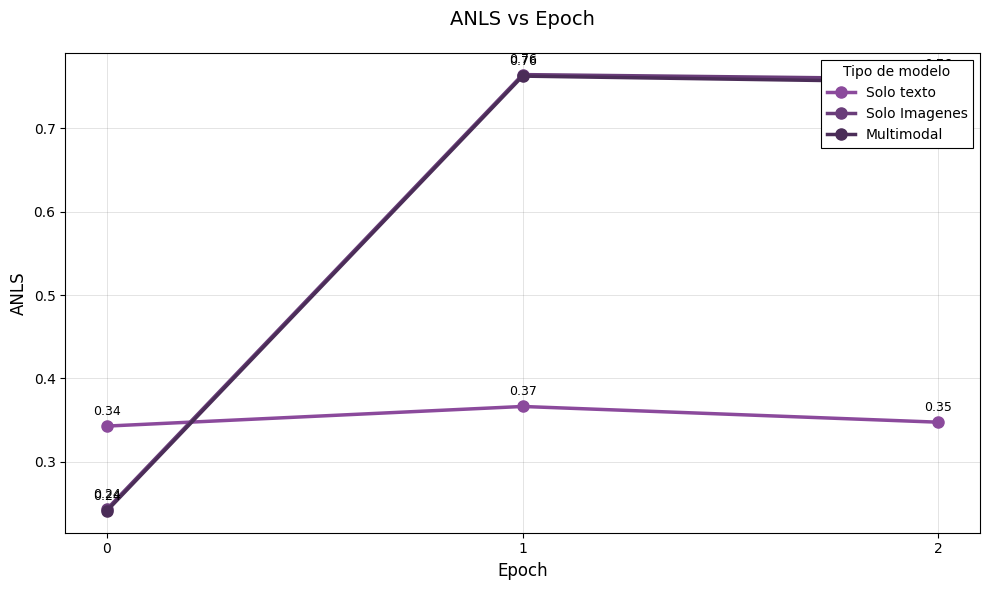

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Define your model series
series_llama_text_only = [
    "llama_only_text",
    "llama_finetuned_text_only",
    "llama_finetuned_2_text_only",
]

series_llama_image_only = [
    "llama_only_image",
    "llama_finetuned_image_only",
    "llama_finetuned_2_image_only",
]

series_llama_multimodal = [
    "llama_multimodal",
    "llama_finetuned_multimodal",
    "llama_finetuned_2_multimodal",
]

# Map model names to epoch numbers
epoch_mapping = {
    "llama_only_text": 0, "llama_only_image": 0, "llama_multimodal": 0,
    "llama_finetuned_text_only": 1, "llama_finetuned_image_only": 1, "llama_finetuned_multimodal": 1,
    "llama_finetuned_2_text_only": 2, "llama_finetuned_2_image_only": 2, "llama_finetuned_2_multimodal": 2
}

# Add epoch column to the dataframe
df_metrics['epoch'] = df_metrics['model'].map(epoch_mapping)

# Create the plot with matching style
plt.figure(figsize=(10, 6))

# Set style similar to the image
plt.style.use('default')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.8

# Define colors matching the purple theme in the image
colors = ['#8B4A9C', '#6A3D7A', '#4B2D58']

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i, series in enumerate([series_llama_text_only, series_llama_image_only, series_llama_multimodal]):
    # Get the correct label based on the pattern in the model names
    if i == 0:
        series_label = "Solo texto"
    elif i == 1:
        series_label = "Solo Imagenes"
    else:
        series_label = "Multimodal"
    
    # Get data for this series
    series_data = df_metrics[df_metrics['model'].isin(series)]
    
    # Sort by epoch for proper line plotting
    series_data = series_data.sort_values('epoch')
    
    # Plot the series with thicker lines and larger markers
    ax.plot(
        series_data['epoch'],
        series_data['anls'],
        label=series_label,
        marker='o',
        linewidth=2.5,
        markersize=8,
        color=colors[i]
    )

# Set up the plot styling to match the image
ax.set_title("ANLS vs Epoch", fontsize=14, fontweight='normal', pad=20)
ax.set_xlabel("Epoch", fontsize=12)
ax.set_ylabel("ANLS", fontsize=12)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['0', '1', '2'])

# Style the grid to match the image
ax.grid(True, linestyle='-', alpha=0.3, color='gray', linewidth=0.5)
ax.set_axisbelow(True)

# Style the legend to match the image
legend = ax.legend(title='Tipo de modelo', 
                  loc='upper right',
                  frameon=True,
                  fancybox=False,
                  shadow=False,
                  framealpha=1,
                  edgecolor='black',
                  facecolor='white')
legend.get_frame().set_linewidth(0.8)

# Add text labels for parsing error values
for i, series in enumerate([series_llama_text_only, series_llama_image_only, series_llama_multimodal]):
    series_data = df_metrics[df_metrics['model'].isin(series)].sort_values('epoch')
    for j, row in series_data.iterrows():
        ax.text(row['epoch'], row['anls'] + 0.01, f"{row['anls']:.2f}", 
                ha='center', va='bottom', fontsize=9, color='black')

# Set background color to match
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# Adjust layout
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

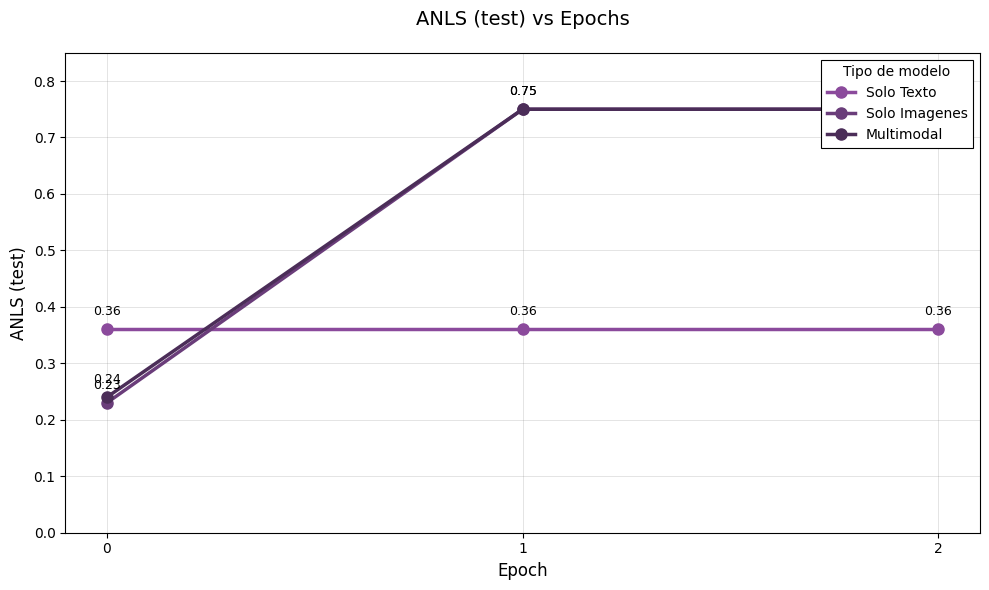

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
results_over_test = [
    {"llama_text_only": [
        0.36, 0.36, 0.36
    ]},
    {"llama_image_only": [
        0.23, 0.75, 0.75
    ]},
    {"llama_multimodal": [
        0.24, 0.75, 0.75
    ]}
]

labels = ['Solo Texto', 'Solo Imagenes', 'Multimodal']
epochs = ['0', '1', '2']

# Extract data for plotting
text_only_data = results_over_test[0]["llama_text_only"]
image_only_data = results_over_test[1]["llama_image_only"]
multimodal_data = results_over_test[2]["llama_multimodal"]

# Create the plot with matching style
plt.figure(figsize=(10, 6))

# Set style similar to the image
plt.style.use('default')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.8

# Define colors matching the purple theme in the image
colors = ['#8B4A9C', '#6A3D7A', '#4B2D58']

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
epoch_values = [0, 1, 2]

# Plot Solo Texto
ax.plot(epoch_values, text_only_data, 
        label='Solo Texto', 
        marker='o', 
        linewidth=2.5, 
        markersize=8, 
        color=colors[0])

# Plot Solo Imagenes
ax.plot(epoch_values, image_only_data, 
        label='Solo Imagenes', 
        marker='o', 
        linewidth=2.5, 
        markersize=8, 
        color=colors[1])

# Plot Multimodal
ax.plot(epoch_values, multimodal_data, 
        label='Multimodal', 
        marker='o', 
        linewidth=2.5, 
        markersize=8, 
        color=colors[2])

# Set up the plot styling to match the image
ax.set_title("ANLS (test) vs Epochs", fontsize=14, fontweight='normal', pad=20)
ax.set_xlabel("Epoch", fontsize=12)
ax.set_ylabel("ANLS (test)", fontsize=12)
ax.set_xticks(epoch_values)
ax.set_xticklabels(epochs)

# Style the grid to match the image
ax.grid(True, linestyle='-', alpha=0.3, color='gray', linewidth=0.5)
ax.set_axisbelow(True)

# Style the legend to match the image
legend = ax.legend(title='Tipo de modelo', 
                  loc='upper right',
                  frameon=True,
                  fancybox=False,
                  shadow=False,
                  framealpha=1,
                  edgecolor='black',
                  facecolor='white')
legend.get_frame().set_linewidth(0.8)

# Add text labels for parsing error values
datasets = [text_only_data, image_only_data, multimodal_data]
for i, data in enumerate(datasets):
    for j, value in enumerate(data):
        ax.text(epoch_values[j], value + 0.02, f"{value:.2f}", 
                ha='center', va='bottom', fontsize=9, color='black')

# Set background color to match
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# Set y-axis limits for better visualization
ax.set_ylim(0, max(max(text_only_data), max(image_only_data), max(multimodal_data)) + 0.1)

# Adjust layout
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

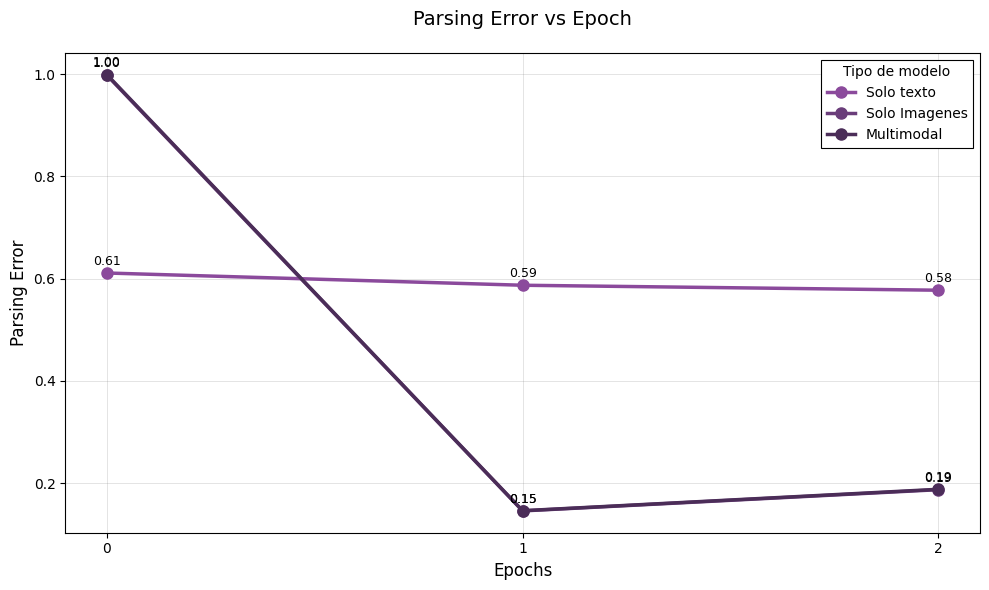

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Define your model series
series_llama_text_only = [
    "llama_only_text",
    "llama_finetuned_text_only",
    "llama_finetuned_2_text_only",
]

series_llama_image_only = [
    "llama_only_image",
    "llama_finetuned_image_only",
    "llama_finetuned_2_image_only",
]

series_llama_multimodal = [
    "llama_multimodal",
    "llama_finetuned_multimodal",
    "llama_finetuned_2_multimodal",
]

# Map model names to epoch numbers
epoch_mapping = {
    "llama_only_text": 0, "llama_only_image": 0, "llama_multimodal": 0,
    "llama_finetuned_text_only": 1, "llama_finetuned_image_only": 1, "llama_finetuned_multimodal": 1,
    "llama_finetuned_2_text_only": 2, "llama_finetuned_2_image_only": 2, "llama_finetuned_2_multimodal": 2
}

# Add epoch column to the dataframe
df_metrics['epoch'] = df_metrics['model'].map(epoch_mapping)

# Create the plot with matching style
plt.figure(figsize=(10, 6))

# Set style similar to the image
plt.style.use('default')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.8

# Define colors matching the purple theme in the image
colors = ['#8B4A9C', '#6A3D7A', '#4B2D58']

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i, series in enumerate([series_llama_text_only, series_llama_image_only, series_llama_multimodal]):
    # Get the correct label based on the pattern in the model names
    if i == 0:
        series_label = "Solo texto"
    elif i == 1:
        series_label = "Solo Imagenes"
    else:
        series_label = "Multimodal"
    
    # Get data for this series
    series_data = df_metrics[df_metrics['model'].isin(series)]
    
    # Sort by epoch for proper line plotting
    series_data = series_data.sort_values('epoch')
    
    # Plot the series with thicker lines and larger markers
    ax.plot(
        series_data['epoch'],
        series_data['parsing_error'],
        label=series_label,
        marker='o',
        linewidth=2.5,
        markersize=8,
        color=colors[i]
    )

# Set up the plot styling to match the image
ax.set_title("Parsing Error vs Epoch", fontsize=14, fontweight='normal', pad=20)
ax.set_xlabel("Epochs", fontsize=12)
ax.set_ylabel("Parsing Error", fontsize=12)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['0', '1', '2'])

# Style the grid to match the image
ax.grid(True, linestyle='-', alpha=0.3, color='gray', linewidth=0.5)
ax.set_axisbelow(True)

# Style the legend to match the image
legend = ax.legend(title='Tipo de modelo', 
                  loc='upper right',
                  frameon=True,
                  fancybox=False,
                  shadow=False,
                  framealpha=1,
                  edgecolor='black',
                  facecolor='white')
legend.get_frame().set_linewidth(0.8)

# Add text labels for parsing error values
for i, series in enumerate([series_llama_text_only, series_llama_image_only, series_llama_multimodal]):
    series_data = df_metrics[df_metrics['model'].isin(series)].sort_values('epoch')
    for j, row in series_data.iterrows():
        ax.text(row['epoch'], row['parsing_error'] + 0.01, f"{row['parsing_error']:.2f}", 
                ha='center', va='bottom', fontsize=9, color='black')

# Set background color to match
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# Adjust layout
plt.tight_layout()
plt.show()

In [84]:
# explote by question_types	
df_merged_models_2 = df_merged[df_merged["model"].isin(models_to_compare_2)].copy()
df_exploded = df_merged_models_2.explode('question_types')
# group by model and questionType and calculate mean metrics
df_exploded_metrics = df_exploded.groupby(['model', 'question_types']).agg({
    'wer': 'mean',
    'cer': 'mean',
    'anls': 'mean',
    'parsing_error': 'mean'
}).reset_index()

In [85]:
df_exploded_metrics

,model,question_types,wer,cer,anls,parsing_error
0,gpt-4-1-mini,Image/Photo,0.720238,0.665700,0.392074,0.112245
1,gpt-4-1-mini,Yes/No,0.702381,0.547619,0.578571,0.000000
2,gpt-4-1-mini,figure/diagram,0.579437,0.490476,0.514804,0.003774
3,gpt-4-1-mini,form,0.401950,0.274810,0.742349,0.008815
4,gpt-4-1-mini,free_text,0.433858,0.361498,0.686197,0.002614
...,...,...,...,...,...,...
103,llama_finetuned_text_only_json,free_text,0.507284,0.352447,0.718884,0.003922
104,llama_finetuned_text_only_json,handwritten,0.718601,0.513729,0.492471,0.009404
105,llama_finetuned_text_only_json,layout,0.620352,0.469482,0.580776,0.021201
106,llama_finetuned_text_only_json,others,0.591097,0.475438,0.565815,0.025424


In [108]:
df_exploded_metrics[df_exploded_metrics["model"] == "gpt-4-1-mini"]["model"] = "gpt-4-1-mini-text-only"
df_exploded_metrics[df_exploded_metrics["model"] == "gpt-4-1-nano"]["model"] = "gpt-4-1-nano-text-only"

/tmp/ipykernel_7121/1162385616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exploded_metrics[df_exploded_metrics["model"] == "gpt-4-1-mini"]["model"] = "gpt-4-1-mini-text-only"
/tmp/ipykernel_7121/1162385616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exploded_metrics[df_exploded_metrics["model"] == "gpt-4-1-nano"]["model"] = "gpt-4-1-nano-text-only"


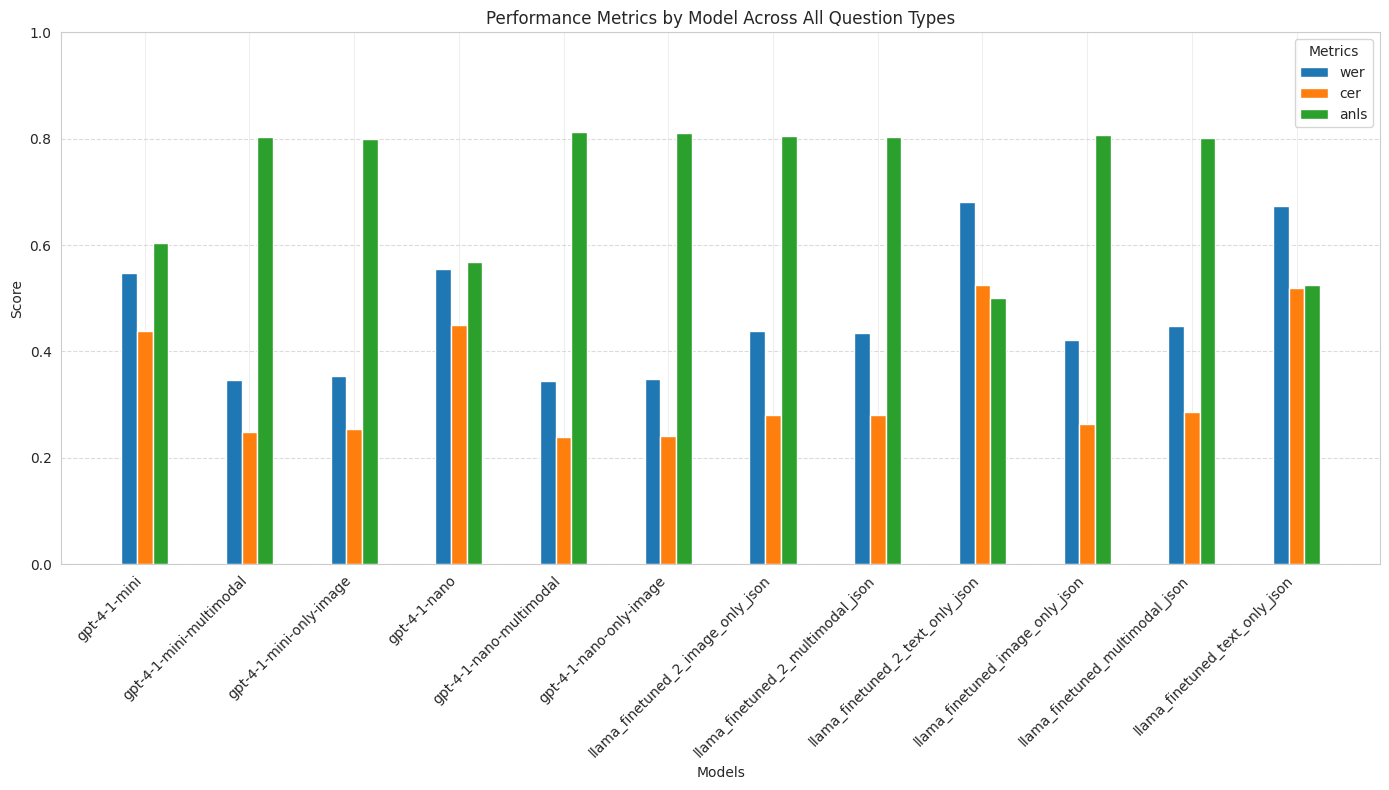

In [109]:
import matplotlib.pyplot as plt
import numpy as np

def plot_metrics_by_model(df, metrics, question_type=None):
    # Filter by question type if specified
    if question_type:
        df = df[df['question_types'] == question_type]
        title_suffix = f" for {question_type} Questions"
    else:
        title_suffix = " Across All Question Types"
    
    # Get unique models
    models = df['model'].unique()
    
    # Set up the plot
    plt.figure(figsize=(14, 8))
    
    # Set width of bars and positions
    bar_width = 0.15
    r = np.arange(len(models))
    
    # Plot each metric as a group of bars
    for i, metric in enumerate(metrics):
        positions = r + i * bar_width
        
        # Calculate mean value for each model
        values = [df[df['model'] == model][metric].mean() for model in models]
        
        plt.bar(positions, values, width=bar_width, label=metric)
    
    # Add labels, title and legend
    plt.xlabel('Models')
    plt.ylabel('Score')
    plt.title('Performance Metrics by Model' + title_suffix)
    plt.xticks(r + bar_width * (len(metrics) - 1) / 2, models, rotation=45, ha='right')
    plt.legend(title='Metrics')
    plt.ylim(0, 1.0)  # Assuming metrics are between 0 and 1
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Define the metrics to plot
metrics = ['wer', 'cer', 'anls']

# Plot for all question types combined
plot_metrics_by_model(df_exploded_metrics, metrics)

# Plot for each question type separately
# for question_type in df_exploded_metrics['question_types'].unique():
#     plot_metrics_by_model(df_exploded_metrics, metrics, question_type)

In [110]:
df_exploded_metrics_gpt = df_exploded_metrics[df_exploded_metrics["model"].str.contains("gpt")].copy()
df_exploded_metrics_llama = df_exploded_metrics[df_exploded_metrics["model"].str.contains("llama")].copy()

In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

def plot_anls_by_model_and_type(df):
    # Set up the plot with a larger size
    plt.figure(figsize=(14, 8))
    
    # Use seaborn for a nicer visual style
    sns.set_style("whitegrid")
    
    # Get unique models and question types
    models = df['model'].unique()
    question_types = df['question_types'].unique()
    
    # Set up width and positions for the bars
    bar_width = 0.8 / len(question_types)
    positions = np.arange(len(models))
    
    # Create a color palette
    colors = sns.color_palette("husl", len(question_types))
    
    # Plot bars for each question type
    for i, q_type in enumerate(question_types):
        # Filter data for this question type
        type_data = df[df['question_types'] == q_type]
        
        # Calculate mean ANLS for each model
        values = [type_data[type_data['model'] == model]['anls'].mean() for model in models]
        
        # Plot the bars
        offset = (i - len(question_types)/2 + 0.5) * bar_width
        plt.bar(positions + offset, values, width=bar_width, label=q_type, color=colors[i])
    
    # Add annotations
    for i, model in enumerate(models):
        for j, q_type in enumerate(question_types):
            type_data = df[(df['question_types'] == q_type) & (df['model'] == model)]
            anls_value = type_data['anls'].mean()
            offset = (j - len(question_types)/2 + 0.5) * bar_width
            plt.text(i + offset, anls_value + 0.01, f'{anls_value:.2f}', 
                     ha='center', va='bottom', fontsize=8, rotation=90)
    
    # Add labels, title and legend
    plt.xlabel('Models', fontsize=12, fontweight='bold')
    plt.ylabel('ANLS Score', fontsize=12, fontweight='bold')
    plt.title('ANLS by Model and Question Type', fontsize=16, fontweight='bold')
    plt.xticks(positions, models, rotation=45, ha='right')
    plt.legend(title='Question Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Set y-axis limits with some padding
    plt.ylim(0, min(1.0, df['anls'].max() * 1.15))
    
    plt.tight_layout()
    plt.show()

# Call the function


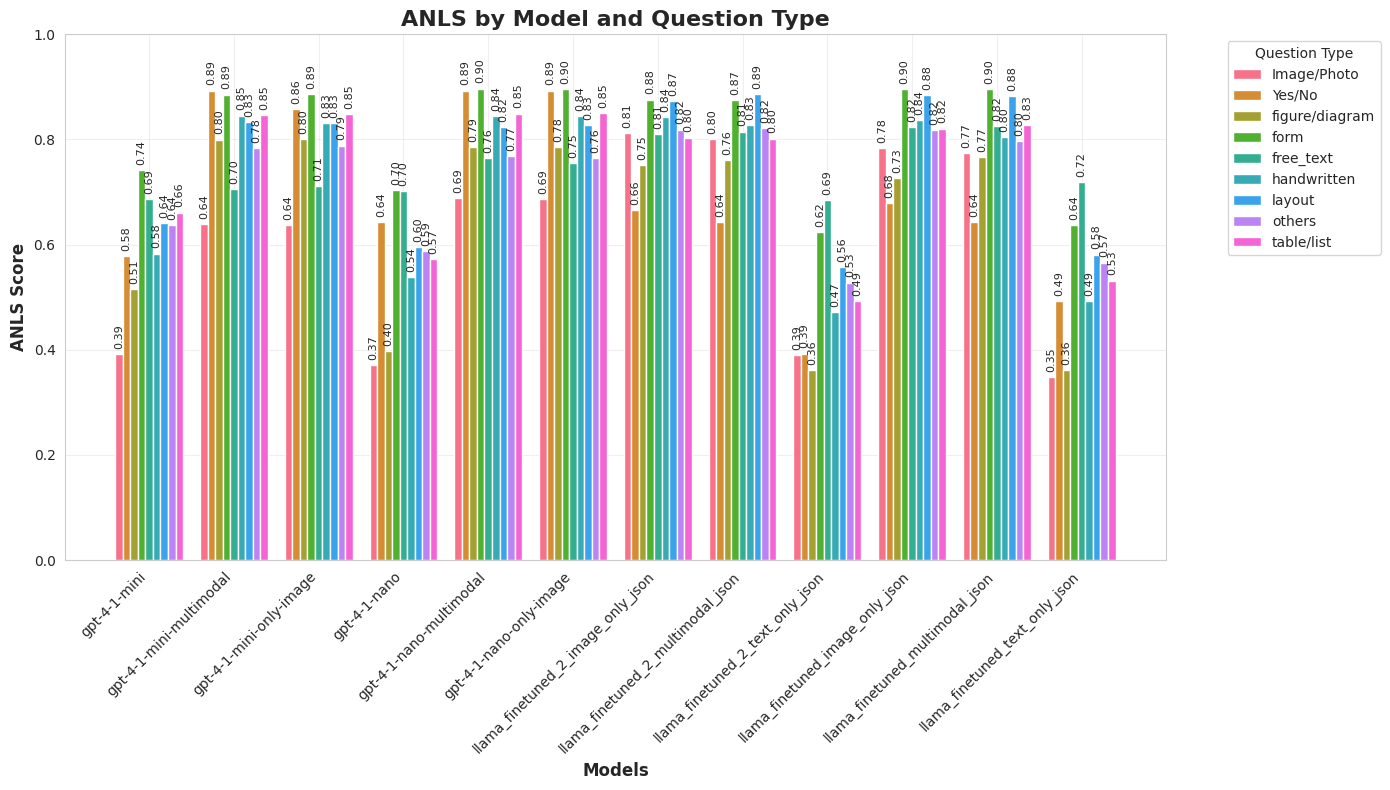

In [112]:
plot_anls_by_model_and_type(df_exploded_metrics)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

def create_radar_chart(df, title="ANLS Score por Categoría de Preguntas"):
    """
    Crea un radar chart con categorías como esquinas y ANLS scores como valores
    
    Parameters:
    df: DataFrame con columnas 'model', 'question_types', 'anls'
    """
    
    # Obtener categorías únicas y modelos únicos
    categories = df['question_types'].unique()
    models = df['model'].unique()
    
    # Número de categorías
    N = len(categories)
    
    # Ángulos para cada categoría
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Cerrar el círculo
    
    # Configurar el plot
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    # Colores para cada modelo (estilo púrpura)
    colors = ['#8B4A9C', '#6A3D7A', '#4B2D58', '#A05B7A', '#7D4E6F']
    
    # Plot para cada modelo
    for idx, model in enumerate(models):
        # Obtener valores ANLS para cada categoría
        values = []
        for category in categories:
            model_category_data = df[(df['model'] == model) & (df['question_types'] == category)]
            if not model_category_data.empty:
                values.append(model_category_data['anls'].mean())
            else:
                values.append(0)  # Si no hay datos para esta combinación
        
        # Añadir el primer valor al final para cerrar el polígono
        values += values[:1]
        
        # Plot
        ax.plot(angles, values, 'o-', linewidth=1.5, 
                label=model, color=colors[idx % len(colors)], markersize=8)
        # ax.fill(angles, values, alpha=0.15, color=colors[idx % len(colors)])
        
        # # Añadir valores en cada punto
        # for angle, value in zip(angles[:-1], values[:-1]):
        #     if value > 0:  # Solo mostrar si hay valor
        #         ax.text(angle, value + 0.05, f'{value:.2f}', 
        #                ha='center', va='center', fontsize=9, 
        #                color=colors[idx % len(colors)], weight='bold')
    
    # Configurar las etiquetas de las categorías
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=11, weight='bold')
    
    # Configurar los límites radiales
    max_value = df['anls'].max()
    ax.set_ylim(0, min(1.0, max_value * 1.1))
    
    # Configurar las líneas de la grilla radial
    y_ticks = np.linspace(0, min(1.0, max_value * 1.1), 6)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([f'{tick:.1f}' for tick in y_ticks], fontsize=9)
    ax.grid(True, alpha=0.3)
    
    # Estilo similar a tu imagen
    ax.set_facecolor('white')
    
    # Título y leyenda
    plt.title(title, size=14, fontweight='normal', pad=30)
    
    # Leyenda con estilo similar a la imagen
    legend = plt.legend(title='Tipo de modelo',
                       loc='upper right', 
                       bbox_to_anchor=(1.4, 1.1),
                       frameon=True, 
                       fancybox=False, 
                       shadow=False,
                       framealpha=1, 
                       edgecolor='black', 
                       facecolor='white')
    legend.get_frame().set_linewidth(0.8)
    
    plt.tight_layout()
    plt.show()
# Call the function to create the radar chart


In [191]:
df_exploded_metrics_gpt

,model,question_types,wer,cer,anls,parsing_error
0,gpt-4-1-mini,Image/Photo,0.720238,0.665700,0.392074,0.112245
1,gpt-4-1-mini,Yes/No,0.702381,0.547619,0.578571,0.000000
2,gpt-4-1-mini,figure/diagram,0.579437,0.490476,0.514804,0.003774
3,gpt-4-1-mini,form,0.401950,0.274810,0.742349,0.008815
4,gpt-4-1-mini,free_text,0.433858,0.361498,0.686197,0.002614
5,gpt-4-1-mini,handwritten,0.665442,0.437115,0.582741,0.021944
6,gpt-4-1-mini,layout,0.519130,0.433824,0.640564,0.015649
7,gpt-4-1-mini,others,0.471450,0.401221,0.637349,0.000000
8,gpt-4-1-mini,table/list,0.431209,0.331309,0.660952,0.009551
9,gpt-4-1-mini-multimodal,Image/Photo,0.499150,0.408395,0.639277,0.030612


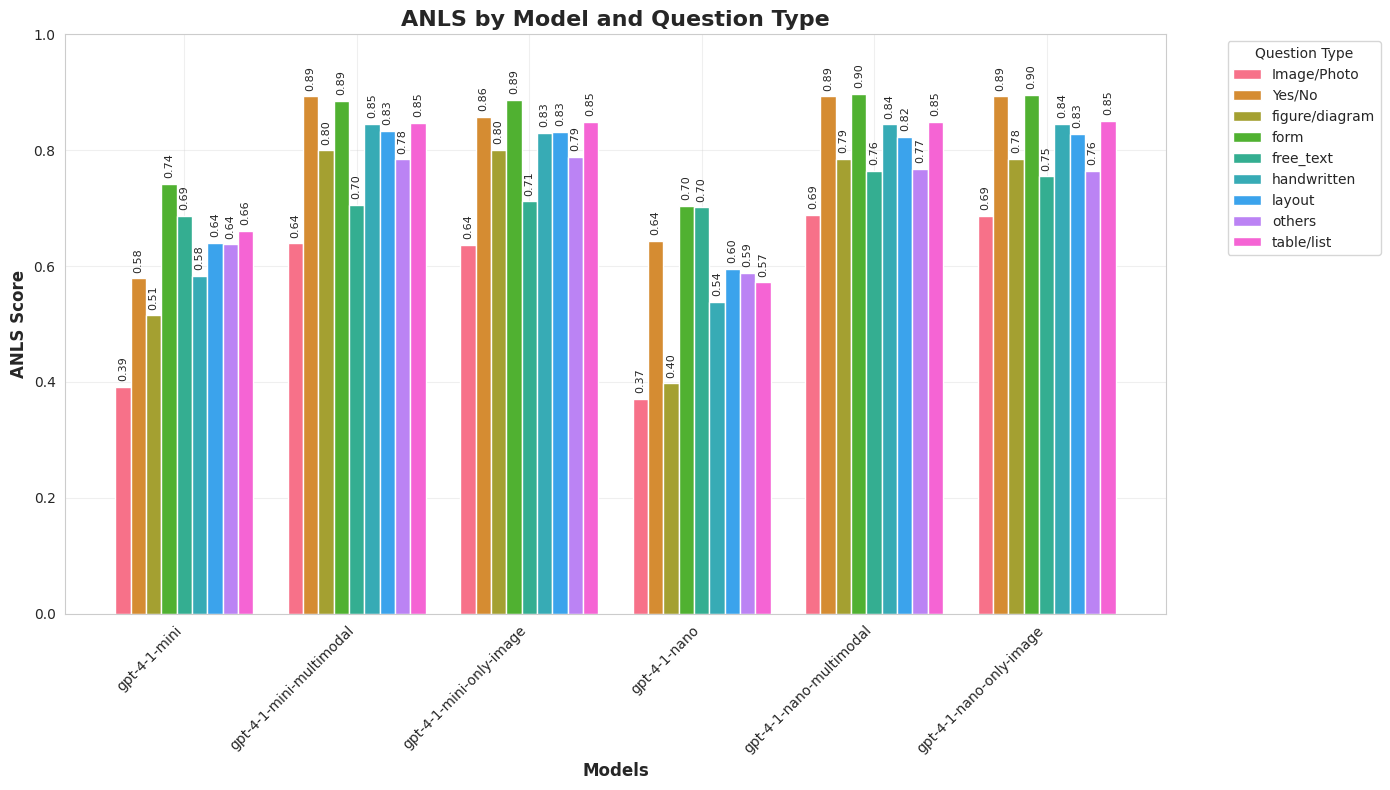

In [192]:
plot_anls_by_model_and_type(df_exploded_metrics_gpt)

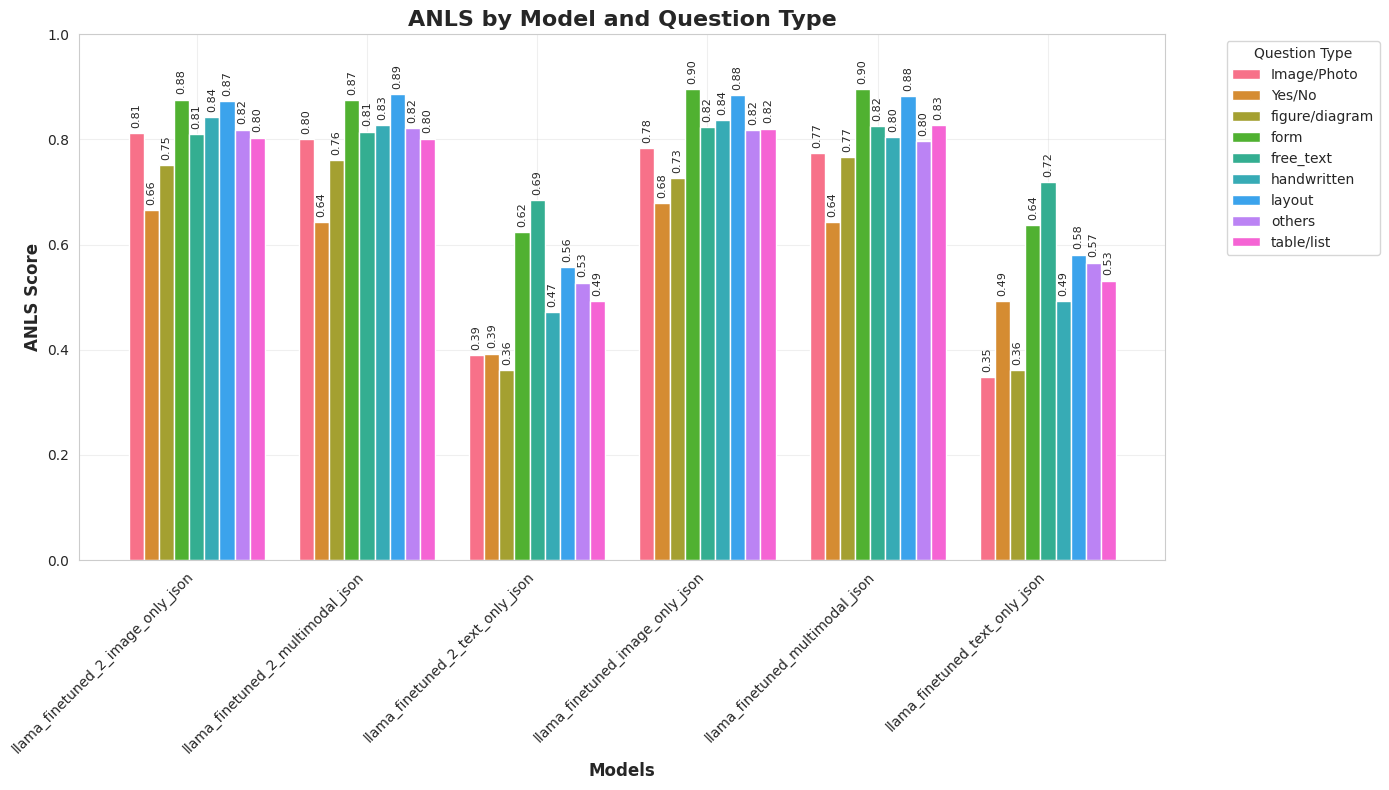

In [193]:
plot_anls_by_model_and_type(df_exploded_metrics_llama)

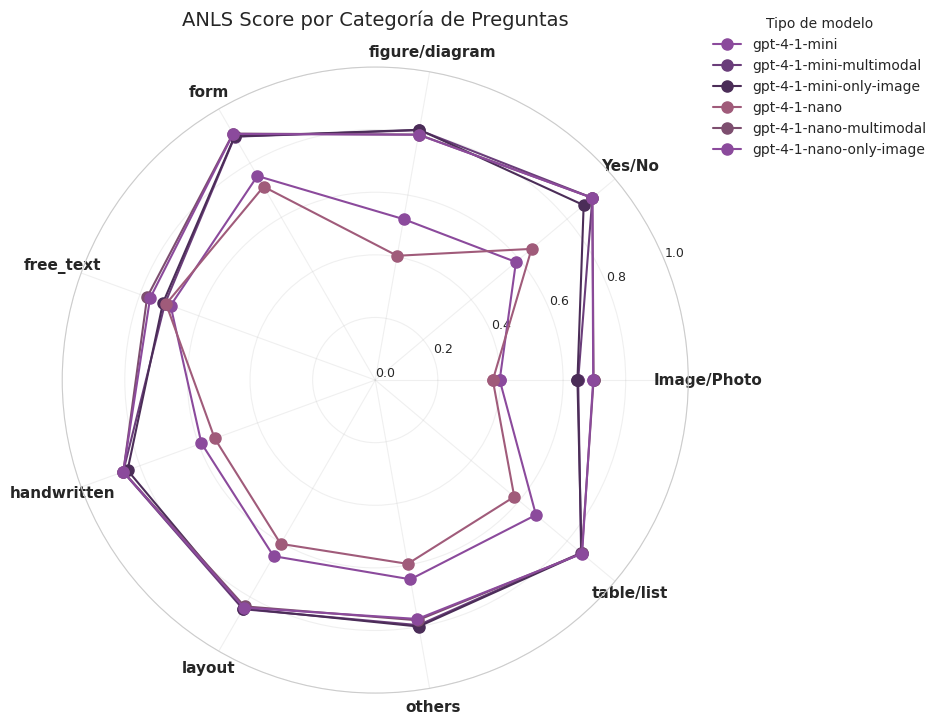

In [194]:
create_radar_chart(df_exploded_metrics_gpt, title="ANLS Score por Categoría de Preguntas")

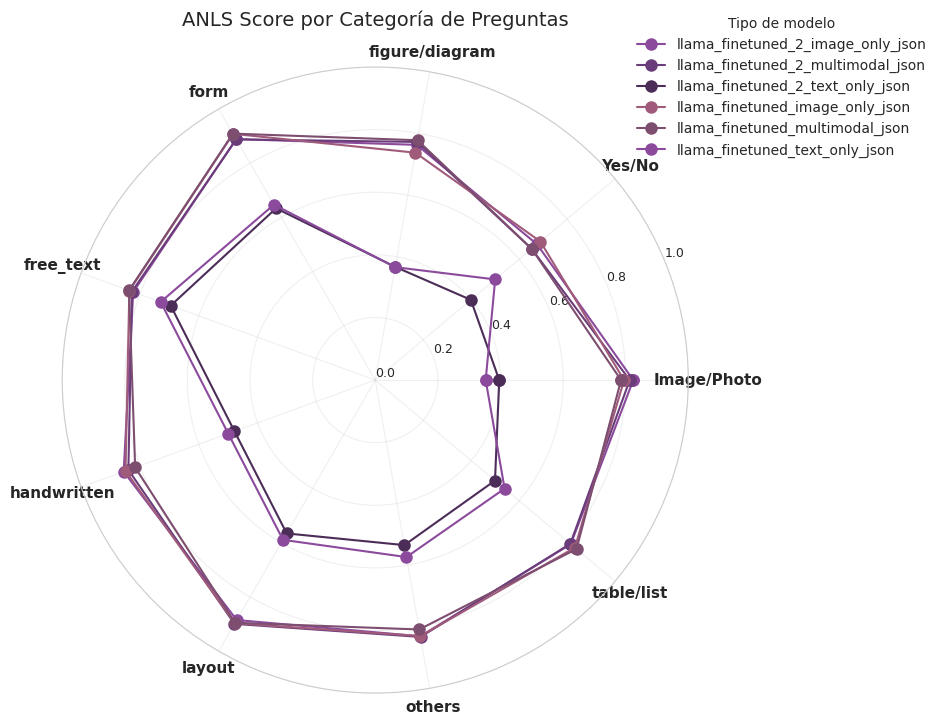

In [195]:
create_radar_chart(df_exploded_metrics_llama, title="ANLS Score por Categoría de Preguntas")

In [196]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

def plot_acc_by_model_and_type_at_threshold(df, threshold=0.5):
    # Set up the plot with a larger size
    plt.figure(figsize=(14, 8))
    
    # Use seaborn for a nicer visual style
    sns.set_style("whitegrid")
    
    # Get unique models and question types
    models = df['model'].unique()
    question_types = df['question_types'].unique()
    
    # Set up width and positions for the bars
    bar_width = 0.8 / len(question_types)
    positions = np.arange(len(models))
    
    # Create a color palette
    colors = sns.color_palette("husl", len(question_types))
    
    # Plot bars for each question type
    for i, q_type in enumerate(question_types):
        # Filter data for this question type
        type_data = df[df['question_types'] == q_type]
        
        # Calculate mean for each model
        values = [type_data[type_data['model'] == model][f'result@{str(threshold).replace(".","_")}'].mean() for model in models]
        
        # Plot the bars
        offset = (i - len(question_types)/2 + 0.5) * bar_width
        plt.bar(positions + offset, values, width=bar_width, label=q_type, color=colors[i])
    
    # Add annotations
    for i, model in enumerate(models):
        for j, q_type in enumerate(question_types):
            type_data = df[(df['question_types'] == q_type) & (df['model'] == model)]
            anls_value = type_data[f'result@{str(threshold).replace(".","_")}'].mean()
            offset = (j - len(question_types)/2 + 0.5) * bar_width
            plt.text(i + offset, anls_value + 0.01, f'{anls_value:.2f}', 
                     ha='center', va='bottom', fontsize=8, rotation=90)
    
    # Add labels, title and legend
    plt.xlabel('Models', fontsize=12, fontweight='bold')
    plt.ylabel('ANLS Score', fontsize=12, fontweight='bold')
    plt.title('ANLS by Model and Question Type', fontsize=16, fontweight='bold')
    plt.xticks(positions, models, rotation=45, ha='right')
    plt.legend(title='Question Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Set y-axis limits with some padding
    plt.ylim(0, min(1.0, df[f'result@{str(threshold).replace(".","_")}'].max() * 1.15))
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_acc_by_model_and_type_at_threshold(df_exploded_metrics, threshold=0.9)

KeyError: 'result@0_9'

<Figure size 1400x800 with 0 Axes>